In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import matplotlib as mpl
mpl.rc("savefig", dpi=300)

In [4]:
df = pd.read_json("train.json")

In [17]:
#df.head(3)

# Data Preprocessing and Feature Engineering

In [5]:
# Cut data by 1st and 99th percentile
def price_percent_cut(df_NEW, col):
    price_low = np.percentile(df_NEW[col].values, 1)
    price_high = np.percentile(df_NEW[col].values, 99)
    
    df_NEW = df_NEW.drop(df_NEW[df_NEW.col < price_low].index)
    df_NEW = df_NEW.drop(df_NEW[df_NEW.col > price_high].index)
    
    return df_NEW


# Datetime object and number of photos feature engineering
def clean_preprocess(initial_df):
    # convert created column into datetime type
    try:        
        initial_df['DateTime'] = pd.to_datetime(initial_df.created)
        initial_df.drop('created', axis=1, inplace=True)

        # create feature for number of photos
        initial_df['num_of_photos'] = initial_df.photos.map(len)
    except:
        print("Clean_Preprocessed function skipped as it can only be run once")
    return initial_df


# Remove prices outside of defined range
def remove_outlier_prices(df_NEW):
    price_low = 1000
    price_high = 15000
    #price_low = np.percentile(df_NEW['price'].values, 0.5)
    #price_high = np.percentile(df_NEW['price'].values, 99.5)
    
    df_NEW = df_NEW.drop(df_NEW[df_NEW.price < price_low].index)
    df_NEW = df_NEW.drop(df_NEW[df_NEW.price > price_high].index)    
    return df_NEW


# Remove locations outside of New York
def remove_nonNY_coords(df_NEW):    
    # Define upper and lower limits for NewYork
    long_low = -74.1
    long_high = -73.6
    lat_low = 35
    lat_high = 41
    
    #Removing out of bounds longitude
    df_NEW = df_NEW.drop(df_NEW[df_NEW.longitude < long_low].index)
    df_NEW = df_NEW.drop(df_NEW[df_NEW.longitude > long_high].index)

    #Removing out of bounds latitude
    df_NEW = df_NEW.drop(df_NEW[df_NEW.latitude < lat_low].index)
    df_NEW = df_NEW.drop(df_NEW[df_NEW.latitude > lat_high].index)

    return df_NEW


# Run it
This cell calls the above functions and show how many rows of data are removed at each step

In [6]:
dataCount = len(df)
print(dataCount,"datapoints in dataset")

df = clean_preprocess(df)
newCount= len(df)
print("cleanPreprocess removed",dataCount-newCount,"datapoints")
dataCount=newCount

df = remove_nonNY_coords(df)
newCount= len(df)
print("remove_nonNY_coords removed",dataCount-newCount,"datapoints")
dataCount=newCount

df = remove_outlier_prices(df)
newCount= len(df)
print("remove_outlier_prices removed",dataCount-newCount,"datapoints")

print(newCount, "datapoints remaining")

49352 datapoints in dataset
cleanPreprocess removed 0 datapoints
remove_nonNY_coords removed 60 datapoints
remove_outlier_prices removed 268 datapoints
49024 datapoints remaining


# Plotting

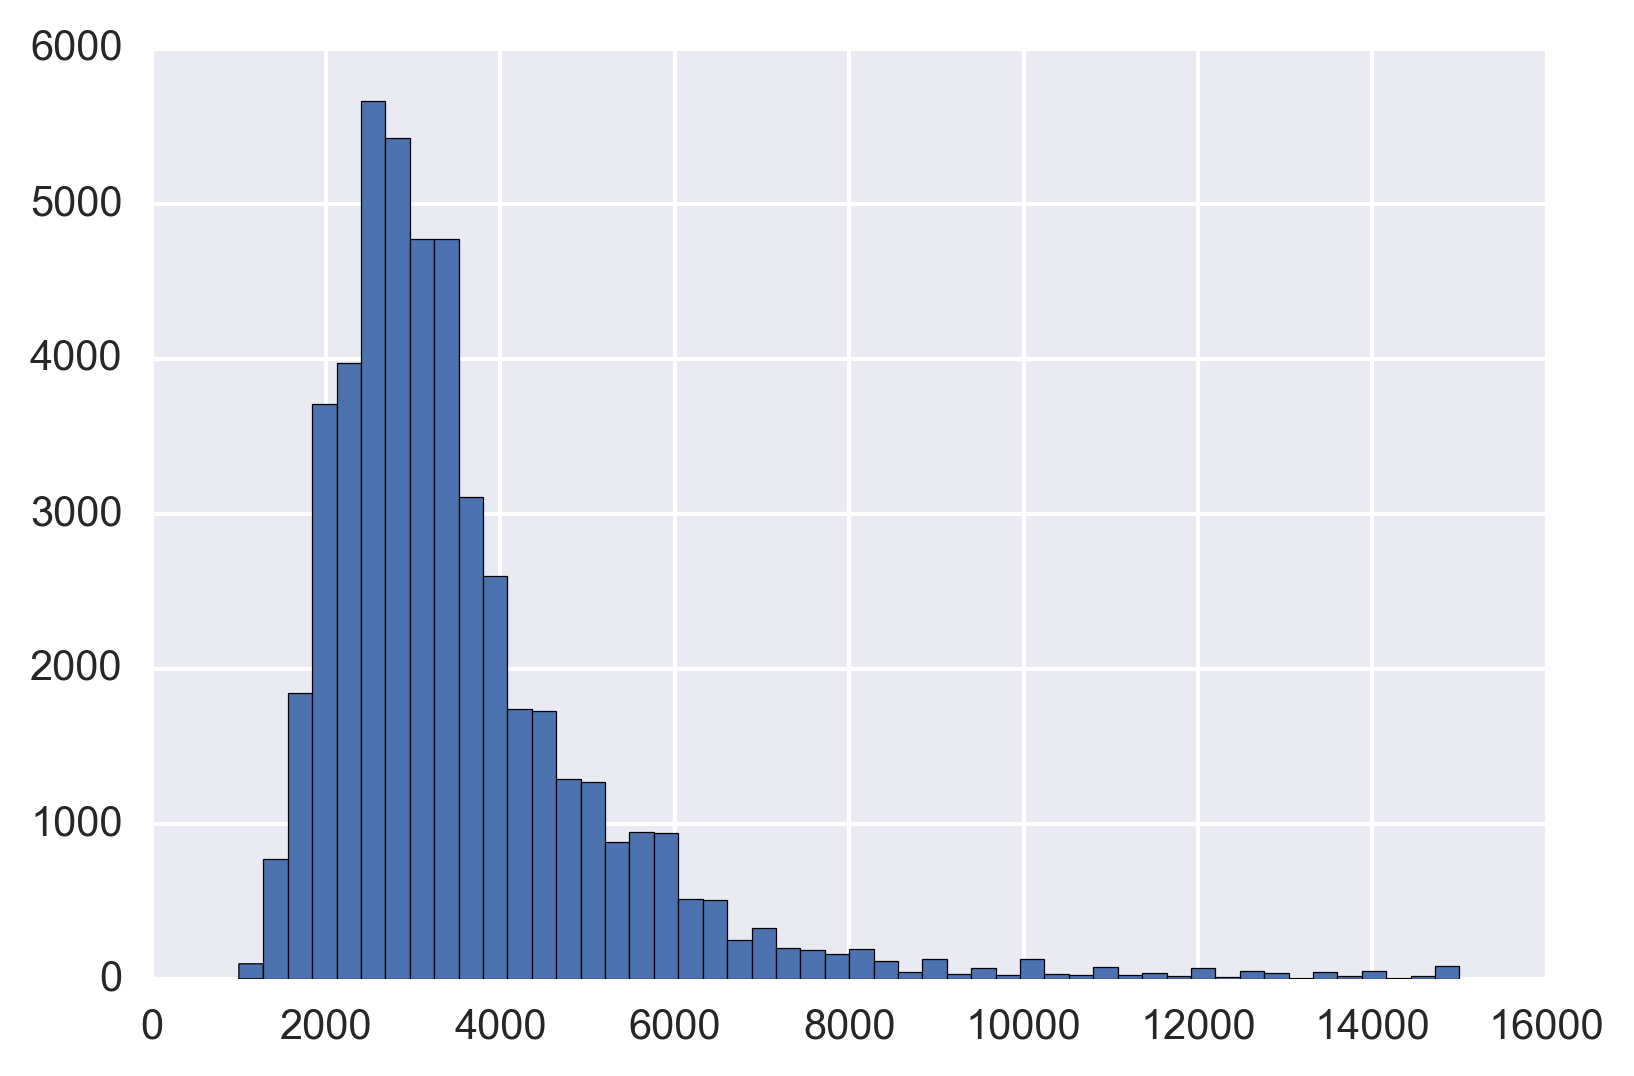

In [7]:
import matplotlib.pyplot as plt

#plt.scatter(df['longitude'], df['latitude'])
plt.hist(df['price'], 50)
#plt.hist(df['longitude'],50)
#plt.hist(df['longitude'],50)
plt.show()

# Feature Creation

In [6]:
# distance from borough centres

the_bronx = [40.8448, -73.8648]
manhattan = [40.7831, -73.9712]
queens = [40.7282, -73.7949]
brooklyn = [40.6782, -73.9442]
staten_island = [40.5795, -74.1502]

borough_list = {'the_bronx': the_bronx, 'manhattan': manhattan, 'queens': queens, 'brooklyn': brooklyn, 'staten_island': staten_island}

def euclid_dist(x, lat, long):
    return np.sqrt((x[0]-lat)**2 + (x[1]-long)**2)

for key in borough_list:
    df[key] = df[['latitude','longitude']].apply(euclid_dist, args=(borough_list[key]), axis=1)

# Exploratory Data Analysis

In [121]:
df.head(3)

,bathrooms,bedrooms,building_id,description,display_address,features,interest_level,latitude,listing_id,longitude,...,photos,price,street_address,DateTime,num_of_photos,the_bronx,staten_island,brooklyn,queens,manhattan
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,...,[https://photos.renthop.com/2/7211212_1ed4542e...,3000.0,792 Metropolitan Avenue,2016-06-24 07:54:24,5,0.151708,0.247718,0.036340,0.148234,0.074362
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,...,[https://photos.renthop.com/2/7150865_be3306c5...,5465.0,808 Columbus Avenue,2016-06-12 12:19:27,11,0.113550,0.282813,0.118653,0.184221,0.012442
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,...,[https://photos.renthop.com/2/6887163_de85c427...,2850.0,241 W 13 Street,2016-04-17 03:26:41,8,0.173220,0.217713,0.083607,0.207171,0.053841


In [122]:
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price,num_of_photos,the_bronx,staten_island,brooklyn,queens,manhattan
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000
mean,1.21218,1.541640,40.751115,7.024055e+06,-73.955716,3610.277476,5.606946,0.166909,0.269227,0.107933,0.204170,0.069262
std,0.50142,1.115018,0.038371,1.262746e+05,1.177912,1847.162014,3.632283,1.173939,1.176325,1.175903,1.172028,1.177036
min,0.00000,0.000000,40.640400,6.811957e+06,-118.271000,1475.000000,0.000000,0.006181,0.061652,0.002102,0.011951,0.000000
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2500.000000,4.000000,0.117948,0.221910,0.071340,0.170478,0.023817
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3150.000000,5.000000,0.148920,0.243304,0.084598,0.186888,0.039528
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4100.000000,7.000000,0.169689,0.275789,0.099985,0.199309,0.063152
max,10.00000,8.000000,40.861972,7.753784e+06,0.000000,13000.000000,68.000000,73.865083,74.150225,73.944210,73.794952,73.971338


In [5]:
df.columns.tolist()

['bathrooms',
 'bedrooms',
 'building_id',
 'created',
 'description',
 'display_address',
 'features',
 'interest_level',
 'latitude',
 'listing_id',
 'longitude',
 'manager_id',
 'photos',
 'price',
 'street_address']

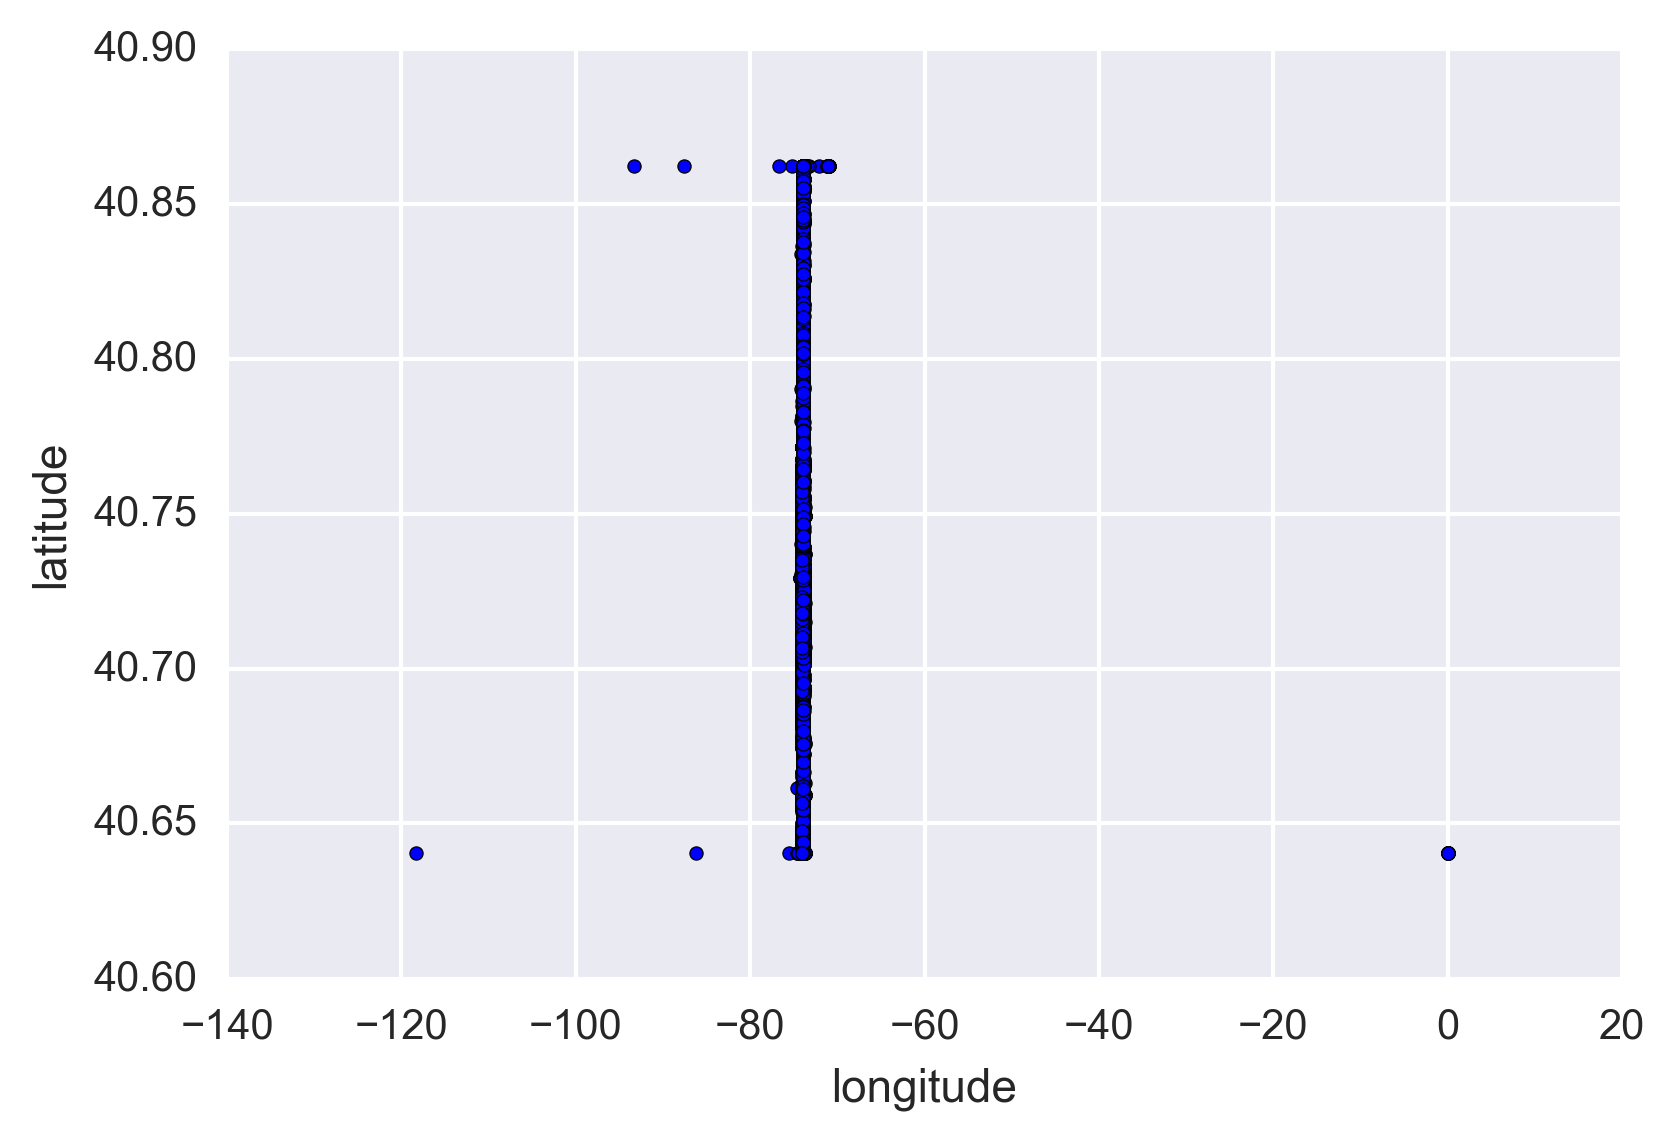

In [9]:
#position data: longitude/latitude

plt.scatter(df.longitude, df.latitude, s = 10)
plt.ylabel('latitude')
plt.xlabel('longitude')

In [122]:
df[df.longitude == 0].count()

bathrooms          12
bedrooms           12
building_id        12
created            12
description        12
display_address    12
features           12
interest_level     12
latitude           12
listing_id         12
longitude          12
manager_id         12
photos             12
price              12
street_address     12
dtype: int64

In [60]:
"""
Considerations with the data:
    imbalanced dataset (not many high interest apartments compared to the rest)
    

Plots to produce
    barplot of interest levels - done
    map of interest levels
    price map
    

Features to use
    bathrooms
    bedrooms
    price

Additional features to create:
    Number of images
    description length
    creation year, month, day
    description word frequency - create features out of top x words
    distance to borough centres


Target:
    Interest Level
"""

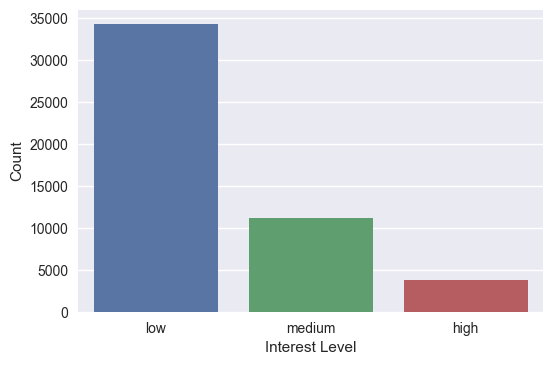

In [124]:
# plot of interest levels
interest_cat = df.interest_level.value_counts()
x = interest_cat.index
y = interest_cat.values

sns.barplot(x, y)
plt.ylabel("Count")
plt.xlabel("Interest Level")

In [91]:
df.bathrooms.value_counts()

1.0     39422
2.0      7660
3.0       745
1.5       645
0.0       313
2.5       277
4.0       159
3.5        70
4.5        29
5.0        20
5.5         5
6.0         4
10.0        1
6.5         1
7.0         1
Name: bathrooms, dtype: int64

In [107]:
df.groupby(by=['interest_level', 'bathrooms'])['interest_level'].count()

interest_level  bathrooms
high            0.0              1
                1.0           3413
                2.0            407
                3.0             14
                4.0              4
low             0.0            306
                1.0          26581
                1.5            605
                2.0           5566
                2.5            274
                3.0            671
                3.5             70
                4.0            150
                4.5             29
                5.0             20
                5.5              5
                6.0              4
                6.5              1
                7.0              1
                10.0             1
medium          0.0              6
                1.0           9428
                1.5             40
                2.0           1687
                2.5              3
                3.0             60
                4.0              5
Name: interest_level, dtype: 

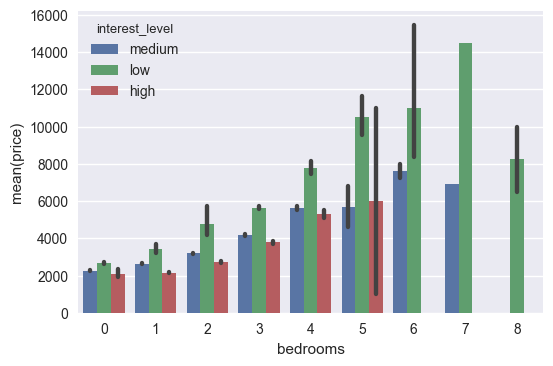

In [112]:
sns.barplot(x='bedrooms',y='price',hue='interest_level', data=df)

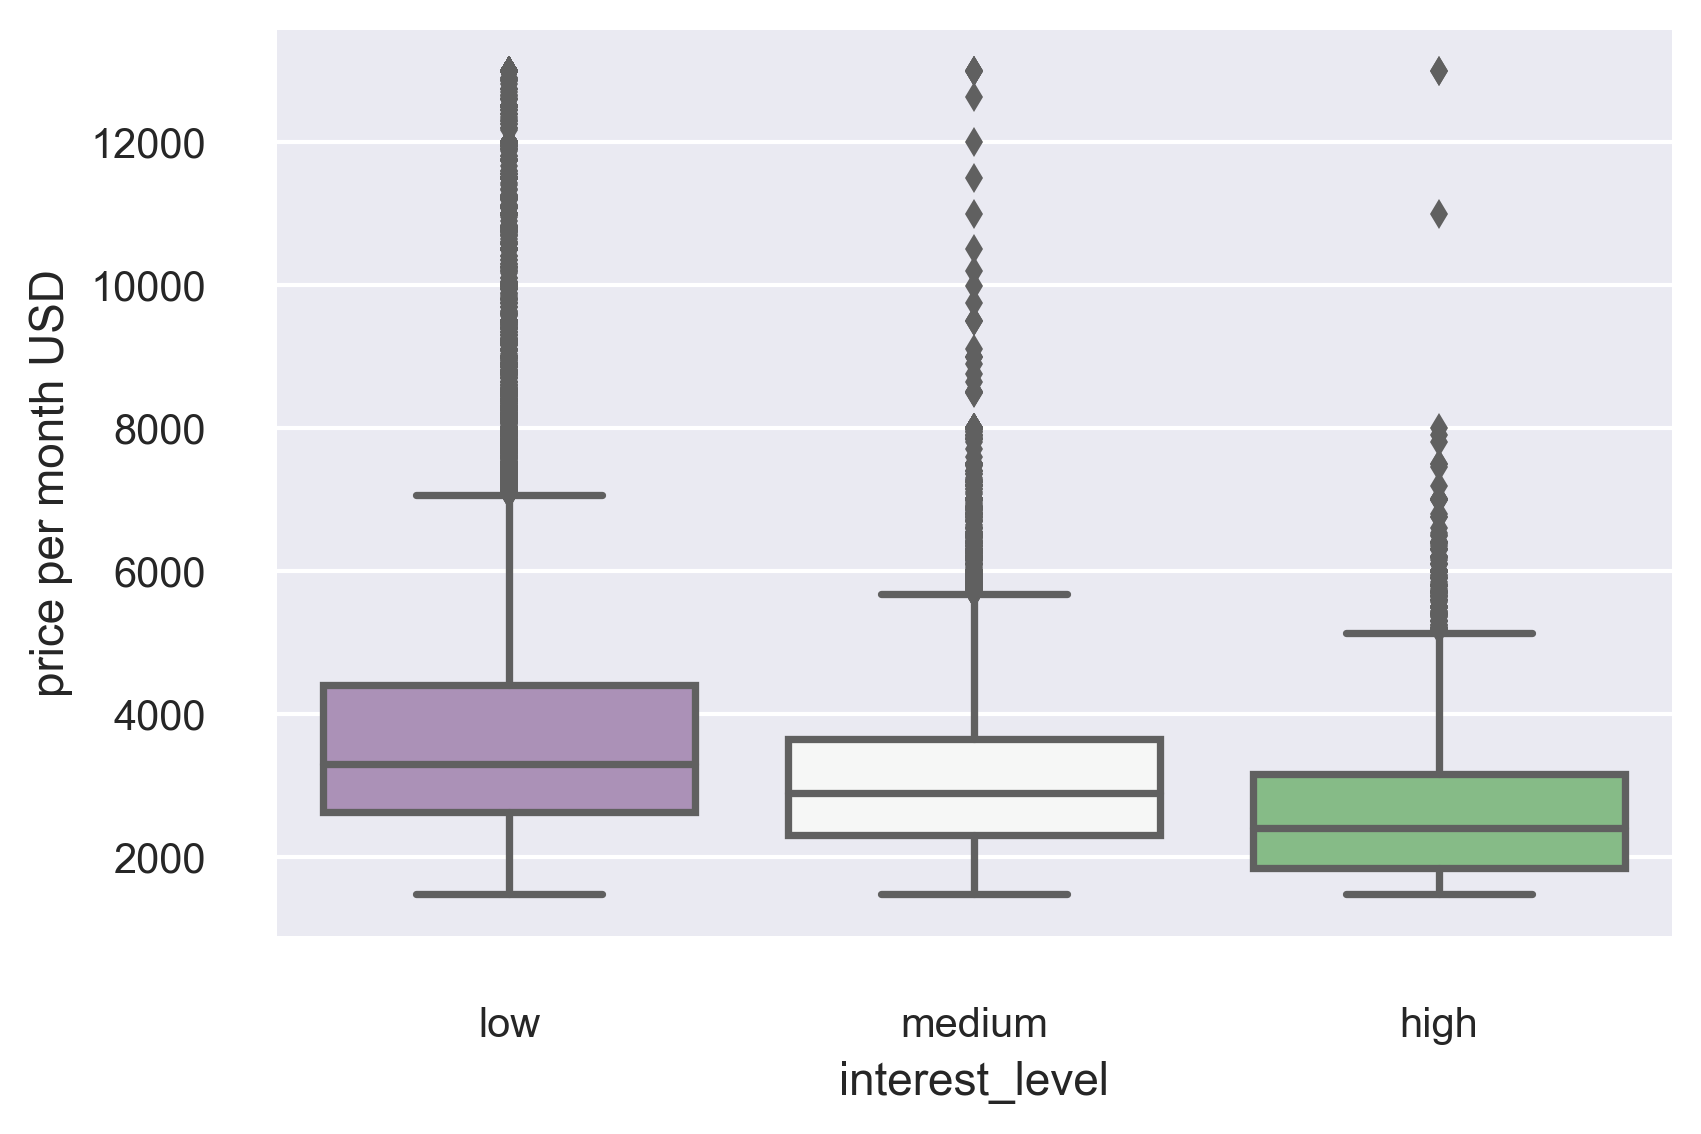

In [130]:
sns.boxplot(x="interest_level", y="price", data=df, palette="PRGn", order=['low','medium','high'])
sns.despine(offset=10, trim=True)
plt.ylabel('price per month USD')

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


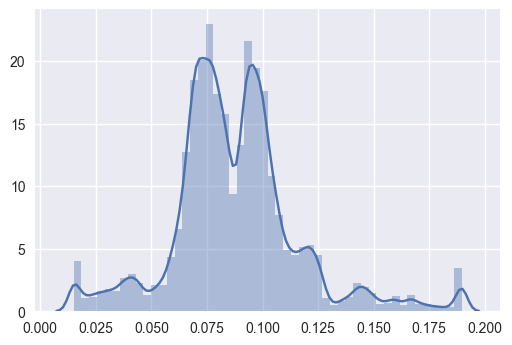

# Description BoW

In [64]:
import nltk
from nltk.stem import WordNetLemmatizer
import re, html


description = "A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy These Following Apartment Features As You Rent Here? Modern Designed Bathroom w/ a Deep Spa Soaking Tub? Room to Room AC/Heat? Real Oak Hardwood Floors? Rain Forest Shower Head? SS steel Appliances w/ Chef Gas Cook Oven & LG Fridge? washer /dryer in the apt? Cable Internet Ready? Granite Counter Top Kitchen w/ lot of cabinet storage spaceIt's Just A Few blocks To L Train<br /><br />Don't miss out!<br /><br />We have several great apartments in the immediate area.<br /><br />For additional information 687-878-2229<p><a  website_redacted" 

wordFreqDict = {}
tag_re = re.compile(r'(<!--.*?-->|<[^>]*>)')

def makeFreqDict(description):
# takes a string, splits it up and add the occurances of each word to the dictionary
    no_tags = tag_re.sub('', description)
    description = html.escape(no_tags)   
    words = nltk.tokenize.word_tokenize(description)
    
    unimportant_words = [':', 'http', '.', ',', '?', '...', "'s", "n't", 'RT', ';', '&', ')', '``', 'u', '(', "''", '|',]
    for word in words:
        if word not in unimportant_words:
            word = WordNetLemmatizer().lemmatize(word)
    
            if word in wordFreqDict:
                wordFreqDict[word] += 1
            else:
                wordFreqDict[word] = 1
                        
makeFreqDict(description)

# Modelling

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score as cv
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import normalize

In [131]:
# quick check to see the available features
df.columns.tolist()

['bathrooms',
 'bedrooms',
 'building_id',
 'description',
 'display_address',
 'features',
 'interest_level',
 'latitude',
 'listing_id',
 'longitude',
 'manager_id',
 'photos',
 'price',
 'street_address',
 'DateTime',
 'num_of_photos',
 'the_bronx',
 'staten_island',
 'brooklyn',
 'queens',
 'manhattan']

In [147]:
features_to_use = ['bathrooms','bedrooms','price', 'the_bronx', 'staten_island','manhattan','queens','brooklyn', 'num_of_photos']
features = df[features_to_use]
features = normalize(features)

target_conversion = {'low':0,'medium':1,'high':2}

In [157]:
target = df.interest_level.map(target_conversion).values

In [158]:
model = RandomForestClassifier(n_estimators=100)

In [159]:
model.fit(features, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [160]:
y_hat = model.predict(features)

In [161]:
confusion_matrix(target, y_hat)

array([[33508,   688,    88],
       [ 1208,  9816,   205],
       [  214,   375,  3250]])

In [162]:
model.score(features, target)

0.94371048792348844

In [166]:
cv(model, features, target)

array([ 0.6992888 ,  0.69898486,  0.69398176])

In [ ]:
# normalise all data
# split data into train val and test sets
# use random with set seed for repeatable results
# check the labels to ensure good split between classes

In [167]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf = clf.fit(features, target)
clf.feature_importances_

array([ 0.09728431,  0.11923475,  0.08363386,  0.11771258,  0.11732665,
        0.11257783,  0.11801225,  0.11212005,  0.12209773])